In [8]:
from keras.datasets import boston_housing
import numpy as np

In [2]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

57344/57026 [==============================] - 1s 9us/step


In [3]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

In [6]:
train_labels.shape, test_labels.shape

((404,), (102,))

In [17]:
standard_value = (train_data - np.mean(train_data, axis=0)) / np.std(train_data, axis=0)

In [20]:
np.std(standard_value), np.mean(standard_value)

(0.9999999999999993, 2.6016254395785847e-15)

In [21]:
standard_value

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [22]:
# 归一化 （normalization）： （Xi -Xmin） / （Xmax - Xmin）
# 标准化 （standardization） （Xi - u） / theta
# tips 对输出结果有范围要求用归一化
#      数据较为稳定，不存在极端最大最小值用归一化
#      数据存在异常值和较多噪音 用标准化

#归一化：输出范围0-1之间
#标准化：输出范围负无穷到正无穷

In [26]:
np.min(train_data, axis=0), np.max(train_data, axis=0)
# 可以看出 特征的最小和最大值 范围相差很大，需要用标准化处理

(array([6.3200e-03, 0.0000e+00, 4.6000e-01, 0.0000e+00, 3.8500e-01,
        3.5610e+00, 2.9000e+00, 1.1296e+00, 1.0000e+00, 1.8800e+02,
        1.2600e+01, 3.2000e-01, 1.7300e+00]),
 array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.725 ,
        100.    ,  10.7103,  24.    , 711.    ,  22.    , 396.9   ,
         37.97  ]))

In [27]:
# 标准化数据需要在训练集上进行计算

In [28]:
from keras import models
from keras import layers

In [34]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1], )))

In [35]:
model.add(layers.Dense(64, activation='relu'))

In [36]:
model.add(layers.Dense(1))

In [37]:
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])

In [53]:
history = model.fit(standard_value, train_labels, batch_size=64, epochs=30)

Epoch 1/30
404/404 [==============================] - 0s 27us/step - loss: 13.7636 - mean_absolute_error: 2.6410
Epoch 2/30
404/404 [==============================] - 0s 27us/step - loss: 13.2575 - mean_absolute_error: 2.5437
Epoch 3/30
404/404 [==============================] - 0s 22us/step - loss: 12.9831 - mean_absolute_error: 2.5655
Epoch 4/30
404/404 [==============================] - 0s 30us/step - loss: 12.6231 - mean_absolute_error: 2.5037
Epoch 5/30
404/404 [==============================] - 0s 35us/step - loss: 12.0349 - mean_absolute_error: 2.4074
Epoch 6/30
404/404 [==============================] - 0s 30us/step - loss: 12.2629 - mean_absolute_error: 2.4610
Epoch 7/30
404/404 [==============================] - 0s 35us/step - loss: 11.6209 - mean_absolute_error: 2.4160
Epoch 8/30
404/404 [==============================] - 0s 27us/step - loss: 11.5238 - mean_absolute_error: 2.3711
Epoch 9/30
404/404 [==============================] - 0s 45us/step - loss: 11.6163 - mean_absolu

In [45]:
history.history

{'loss': [70.6396844316237,
  59.74096528610381,
  50.662880793656456,
  44.10587862222501,
  38.102765961448746,
  33.77226742659465,
  30.634102018752902,
  27.65945100312186,
  24.956204990349192,
  23.481104614711043,
  21.792715884671352,
  20.65432644834613,
  19.447601167282254,
  18.35825825681781,
  17.531574929114615,
  16.888545480104955,
  15.8053029598576,
  15.367109912456852,
  14.88769270641969,
  14.118886664362236],
 'mean_absolute_error': [6.4303610867793015,
  5.864380463515178,
  5.362708275861079,
  4.929474221597804,
  4.572500823747994,
  4.254481627209352,
  3.9935068989744282,
  3.788769825850383,
  3.6052281927354266,
  3.4565653494088955,
  3.3090258824943315,
  3.2756545189583655,
  3.150076143812425,
  3.037265699688751,
  2.9762107877448054,
  2.926795997241936,
  2.8352046886293016,
  2.7276021608031624,
  2.696492315518974,
  2.6547941099299064]}

In [46]:
import matplotlib.pyplot as plt

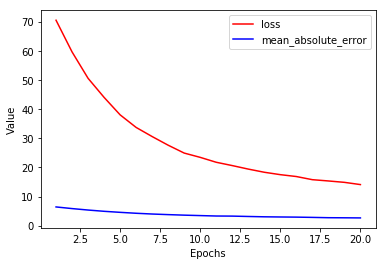

In [51]:
epochs = [i for i in range(1, 21)]
plt.plot(epochs, history.history['loss'], 'r', label='loss')
plt.plot(epochs, history.history['mean_absolute_error'], 'b', label='mean_absolute_error')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.show()

In [52]:
plt.plot??

In [54]:
# 数据集比较小，为了在调节网络参数的同时对网络进行评估， 需要利用交叉验证对网络进行可靠评估

In [69]:
def k_fold_validation(train_data, train_labels, samples, k=4):
    for i in range(4):
        # start = i * smaples_number
        # end = (i+1) * samples_number
        partial_val_data = train_data[i * samples:(i+1)*samples]
        partial_val_label = train_labels[i * samples:(i+1)*samples]
        partital_train_data = np.concatenate([train_data[(i+1)*samples:], train_data[:i*samples]])
        partital_train_label = np.concatenate([train_labels[(i+1)*samples:], train_labels[:i*samples]])
        print(partial_val_data, partial_val_label, partital_train_data, partital_train_label)

In [63]:
samples = int(len(train_data) / len(train_data))

In [64]:
samples

1

In [62]:
t_data = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
t_label = np.array([1, 2, 3, 4])

In [70]:
k_fold_validation(t_data, t_label, 1, k=4)

[[1 2]] [1] [[3 4]
 [5 6]
 [7 8]] [2 3 4]
[[3 4]] [2] [[5 6]
 [7 8]
 [1 2]] [3 4 1]
[[5 6]] [3] [[7 8]
 [1 2]
 [3 4]] [4 1 2]
[[7 8]] [4] [[1 2]
 [3 4]
 [5 6]] [1 2 3]
